In [1]:

# Install Hugging Face libraries
!pip install  --upgrade \
  "transformers==4.38.2" \
  "datasets==2.16.1" \
  "accelerate==0.26.1" \
  "evaluate==0.4.1" \
  "bitsandbytes==0.42.0" \
  "trl==0.7.11" \
  "peft==0.8.2"
!pip install huggingface_hub langchain accelerate --upgrade --quiet


  Using cached accelerate-0.26.1-py3-none-any.whl (270 kB)
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.27.2
    Uninstalling accelerate-0.27.2:
      Successfully uninstalled accelerate-0.27.2


In [2]:
# Clone main branch of FastChat
!git clone https://github.com/philschmid/FastChat.git
# Install FastChat with model worker and llm_judge dependencies
!pip install -e "./FastChat[model_worker,llm_judge]"
!pip install matplotlib tabulate

Cloning into 'FastChat'...
remote: Enumerating objects: 5847, done.
remote: Total 5847 (delta 0), reused 0 (delta 0), pack-reused 5847
Receiving objects: 100% (5847/5847), 31.83 MiB | 16.05 MiB/s, done.
Resolving deltas: 100% (4346/4346), done.
Obtaining file:///content/FastChat
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.5 MB/s eta

In [4]:
import os
from huggingface_hub import InferenceClient, login
from transformers import AutoTokenizer
from langchain.chat_models import ChatOpenAI

# access token with permission to access the model and PRO subscription
hf_token = HF_token # <https://huggingface.co/settings/tokens>
login(token=hf_token)



import torch
from peft import AutoPeftModelForCausalLM
from transformers import  AutoTokenizer, pipeline

peft_model_id = "jinhybr/gemma-7b-Dolly15k-chatml"

# Load Model with PEFT adapter
tokenizer = AutoTokenizer.from_pretrained(peft_model_id)
model = AutoPeftModelForCausalLM.from_pretrained(peft_model_id, device_map="auto", torch_dtype=torch.float16)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)
# get token id for end of conversation
eos_token = tokenizer("<|im_end|>",add_special_tokens=False)["input_ids"][0]

Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MixtralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCa

In [3]:
def test_inference(prompt):
    prompt = pipe.tokenizer.apply_chat_template([{"role": "user", "content": prompt}], tokenize=False, add_generation_prompt=True)
    outputs = pipe(prompt, max_new_tokens=1024, do_sample=True, temperature=0.7, top_k=50, top_p=0.95, eos_token_id=eos_token)
    return outputs[0]['generated_text'][len(prompt):].strip()

In [5]:
prompt = "Who is the current president of United States?"
pred = test_inference(prompt)
print(pred)
# The current president of the United States is Joe Biden. ....


Joe Biden is the current president of United States. He is the 46th president of United States. He is a member of democratic party and the 78th and the current president of United States. He is also the vice president during the Obama administration for 8 years. His term as the president is from 2021.  He is a native of Delaware.  His first name is Joseph and his surname is Biden. His official twitter handle is @JoeBiden.  His first name is spelled as Joe and his surname is spelled as Biden.  He is a native of Delaware.  He is married to Jill Biden.  He has two children, Ashley Biden and Hunter Biden.  Hunter Biden is the son and he is a lawyer by profession.  He is also the former second son of the United States.  Hunter Biden is in the news lately because of his association with China.  Hunter Biden has been in the news for his addiction to drugs and alcohol.  Hunter Biden is also a father to 5 children.  Hunter Biden has been in the news for his association with China and his addict

In [14]:
from datasets import load_dataset

# Load Dolly Dataset.
dataset = load_dataset("Open-Orca/SlimOrca", split="train")



In [16]:
dataset['conversations'][1]

[{'from': 'system',
  'value': 'You are an AI assistant that follows instruction extremely well. Help as much as you can.',
  'weight': None},
 {'from': 'human',
  'value': 'Answer the following question: - number is 54    - debutteam is pittsburgh steelers    - draftpick is 166      - birth date is 24 may 1982    - weight is 243    - nfl is wal475737    - debutyear is 2005    - finalteam is new york sentinels    - statlabel is tackles sacks interceptions    - heightin is 3    - statvalue is 9 0.0 1    - heightft is 6    - college is temple    - birth place is pottstown , pennsylvania    - draftyear is 2005    - position is linebacker    - draftround is 5    - finalyear is 2009    Given the details above, guess who could this information be about.\nAnswer:',
  'weight': 0.0},
 {'from': 'gpt',
  'value': 'The information provided seems to refer to Rian Wallace, a former NFL player.',
  'weight': 1.0}]

In [17]:
prompt = 'Answer the following question: - number is 54    - debutteam is pittsburgh steelers    - draftpick is 166      - birth date is 24 may 1982    - weight is 243    - nfl is wal475737    - debutyear is 2005    - finalteam is new york sentinels    - statlabel is tackles sacks interceptions    - heightin is 3    - statvalue is 9 0.0 1    - heightft is 6    - college is temple    - birth place is pottstown , pennsylvania    - draftyear is 2005    - position is linebacker    - draftround is 5    - finalyear is 2009    Given the details above, guess who could this information be about.\nAnswer:'

In [18]:
pred = test_inference(prompt)
print(pred)

'This could be about Troy Polamalu, the famous NFL player.'


In [19]:
dataset = dataset.shuffle().select(range(100))

In [24]:
dataset['conversations'][1][1]['value']

"It seems as if I slept a few minutes ago , had an eventful dream and then was impolitely woken up . That 's how these 11 weeks at Redmond have whooshed past . And at this point , it 's still unclear to me how so many experiences and so many memories were registered in a single summer .\n\nOptions are: A). None of the above choices .; B). The summer was so exciting it seems like I lived a lot during the summer months .; C). I was so tightly packed that I forgot .; D). My clothes were packed in tight cases and it was disconcerting .;\nAnswer the following question: What is the reason that it was unclear about there being so many memories in a summer ?"

In [25]:
prompt = dataset['conversations'][1][1]['value']
pred = test_inference(prompt)
print(pred)

'It is not clear because there are so many memories in a summer.'


In [27]:
dataset['conversations'][1][2]

{'from': 'gpt',
 'value': "B). The summer was so exciting it seems like I lived a lot during the summer months.\n\nThe reason it was unclear about there being so many memories in a summer is that the author found the summer to be so exciting, full of experiences, and eventful that it felt like a lot happened in a short amount of time.\n\nA). None of the above choices. - This is incorrect because option B is the appropriate choice and provides the reason.\n\nC). I was so tightly packed that I forgot. - This is incorrect because it doesn't address the question of how there were so many memories in a single summer, instead focusing on the author forgetting.\n\nD). My clothes were packed in tight cases and it was disconcerting. - This option is irrelevant and doesn't answer why there were many memories in a single summer.",
 'weight': 1.0}

Generate Responses using our SFT (original) & DPO (trained) model

In [5]:
import os
%cd {os.getcwd()}/FastChat/fastchat/llm_judge
# should be in FastChat


/content/FastChat/fastchat/llm_judge


In [6]:
# make sure that is the correct path
model_path="jinhybr/gemma-7b-Dolly15k-chatml"

model_id="gemma-7b-Dolly15k-chatml"

# generate model answer
!python gen_model_answer.py --model-id {model_id} --model-path {model_path}


Output to data/mt_bench/model_answer/gemma-7b-Dolly15k-chatml.jsonl
Loading checkpoint shards: 100% 4/4 [00:03<00:00,  1.19it/s]
  0% 0/80 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
100% 80/80 [1:58:58<00:00, 89.23s/it]


In [9]:
# Change this to where you saved the model during training, remember our current directory is FastChat/
model_path="mistralai/Mistral-7B-Instruct-v0.2"

model_id="Mistral-7B-Instruct-v0.2"

# generate model answer
!python gen_model_answer.py --model-id {model_id} --model-path {model_path}


Output to data/mt_bench/model_answer/Mistral-7B-Instruct-v0.2.jsonl
tokenizer_config.json: 100% 1.46k/1.46k [00:00<00:00, 6.36MB/s]
tokenizer.model: 100% 493k/493k [00:00<00:00, 77.7MB/s]
tokenizer.json: 100% 1.80M/1.80M [00:00<00:00, 3.58MB/s]
special_tokens_map.json: 100% 72.0/72.0 [00:00<00:00, 438kB/s]
config.json: 100% 596/596 [00:00<00:00, 3.32MB/s]
model.safetensors.index.json: 100% 25.1k/25.1k [00:00<00:00, 80.7MB/s]
model-00001-of-00003.safetensors:   0% 0.00/4.94G [00:00<?, ?B/s]
model-00001-of-00003.safetensors:   1% 52.4M/4.94G [00:00<00:11, 440MB/s]
model-00001-of-00003.safetensors:   2% 115M/4.94G [00:00<00:09, 494MB/s] 
model-00001-of-00003.safetensors:   4% 178M/4.94G [00:00<00:09, 511MB/s]
model-00001-of-00003.safetensors:   5% 241M/4.94G [00:00<00:09, 501MB/s]
model-00001-of-00003.safetensors:   6% 294M/4.94G [00:00<00:10, 452MB/s]
model-00001-of-00003.safetensors:   7% 346M/4.94G [00:00<00:09, 471MB/s]
model-00001-of-00003.safetensors:   8% 409M/4.94G [00:00<00:09, 4

In [17]:
open_ai_key="" # replace with your openai key

# Pairwise comparison of the two models using OpenAI's GPT-4 Turbo
!OPENAI_API_KEY={open_ai_key} python gen_judgment.py --model-list "gemma-7b-Dolly15k-chatml" "Mistral-7B-Instruct-v0.2" --judge-model "gpt-4-1106-preview" --mode "pairwise-all"


Stats:
{
    "bench_name": "mt_bench",
    "mode": "pairwise-all",
    "judge": "gpt-4-1106-preview",
    "baseline": null,
    "model_list": [
        "gemma-7b-Dolly15k-chatml",
        "Mistral-7B-Instruct-v0.2"
    ],
    "total_num_questions": 80,
    "total_num_matches": 160,
    "output_path": "data/mt_bench/model_judgment/gpt-4-1106-preview_pair.jsonl"
}
Evaluating the following models.
  0% 0/160 [00:00<?, ?it/s]question: 81, turn: 1, model_1: gemma-7b-Dolly15k-chatml, model_2: Mistral-7B-Instruct-v0.2, g1_winner: model_2, g2_winner: model_2, judge: ('gpt-4-1106-preview', 'pair-v2')
  1% 1/160 [00:13<35:26, 13.37s/it]question: 82, turn: 1, model_1: gemma-7b-Dolly15k-chatml, model_2: Mistral-7B-Instruct-v0.2, g1_winner: tie, g2_winner: model_2, judge: ('gpt-4-1106-preview', 'pair-v2')
  1% 2/160 [00:27<35:53, 13.63s/it]question: 83, turn: 1, model_1: gemma-7b-Dolly15k-chatml, model_2: Mistral-7B-Instruct-v0.2, g1_winner: model_2, g2_winner: model_2, judge: ('gpt-4-1106-preview'

In [18]:
res = "./data/mt_bench/model_judgment/gpt-4-1106-preview_pair.jsonl"

In [20]:
!python show_result.py --input-file {res} --model-list "gemma-7b-Dolly15k-chatml" "Mistral-7B-Instruct-v0.2" --judge-model "gpt-4-1106-preview" --mode "pairwise-all"

Mode: pairwise-all
Input file: ./data/mt_bench/model_judgment/gpt-4-1106-preview_pair.jsonl
| model                    |   win |   loss |   tie |   win_rate |   loss_rate |   win_rate_adjusted |
|:-------------------------|------:|-------:|------:|-----------:|------------:|--------------------:|
| Mistral-7B-Instruct-v0.2 |   106 |      8 |    44 |  0.670886  |   0.0506329 |            0.810127 |
| gemma-7b-Dolly15k-chatml |     8 |    106 |    44 |  0.0506329 |   0.670886  |            0.189873 |


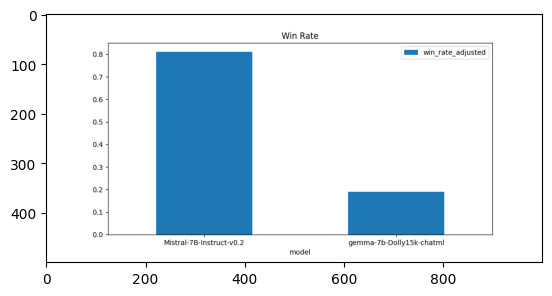

In [22]:
# prompt: THE ABOVE CODE NOT SHOW IMAGE

# Display the image using matplotlib
import matplotlib.pyplot as plt

# Read the image
image = plt.imread("win_rate_gpt-4-1106-preview.png")

# Create a figure and display the image
fig = plt.figure()
plt.imshow(image)
plt.show()


In [25]:
# prompt: SAVE THIS FILE INTO GOOGLE DRIVE " res = "./data/mt_bench/model_judgment/gpt-4-1106-preview_pair.jsonl"

from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [26]:

# Save the file to Google Drive
!cp {res} "/content/drive/MyDrive"